# Meta-analysis simulation
### Odds Ratio; Inverse Variance method; Fixed-effect 
    
This notebook will simulate a fixed-effect meta-analysis of odds ratios. Meta-analysis is a technique for pooling the results from multiple studies, to yield a more precise effect estimate (Haidich, 2010). 

A fixed-effect meta-analysis assumes that the studies are sampling from a population with one effect size, such that all the differences between the study effect sizes is due to sampling error (Borenstein et al, 2010).


To simulate a meta-analysis, I will create a population of individuals. These individuals will be probabilisitcally exposed to a hazard, so each individual is either `exposed` or `non_exposed`. Each individual will then be assigned a disease status (`disease` or `no_disease`), where the probability of having the disease changes conditionally on exposure status. 

The true $\text{odds(outcome)|exposure} $ will also be determined probabilistically. 

I will then simulate a random number of studies, which draw samples from this population. I will perform the meta-analysis on the effect sizes found by the simulated studies, and I will compare the meta-analytic effect size estimate to the true effect size.

In this context, the odds ratio is defined as:

<center>  $ \Large \text{odds ratio} = \frac{\text{odds(outcome)|exposure}}{\text{odds(outcome)|control}} $ 

First, let's import the libraries we need:

In [1]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

# making plots look like R
plt.style.use('ggplot') 
plt.rc('axes', facecolor='white', edgecolor='black', axisbelow=True, grid=False) 
plt.rcParams['figure.figsize'] = (7,6)

Now let's use functions from `np.random` to probabilistically set the population size, the probability of exposure, and the probability of disease given exposure.

The parameters are shown under the cell below:

In [2]:
# an array to store the simulated exposure and disease status of each individual
population = np.array([])

# randomly determining the size of the population
population_size = np.random.randint(5000,20000)

# probabilistically determining the probability of exposure (maximum possibly probability == 30%)
p_exposed = np.random.uniform(high =0.3)

# probabilistically determining how dangerous the exposure is, this will set the probability of disease given exposure
exposure_danger = np.random.uniform(low =0.2, high = 0.4)

# probabilistically determining the unconditional risk of the disease (set to be no higher than the risk given exposure)
disease_general = np.random.uniform(high = exposure_danger)

print('\nDetails of simulated population and parameters:')
print('\nPopulation size =', population_size )
print('Probability of exposure to hazrard = ', np.round(p_exposed,2))
print('Probability of disease given exposure to hazard = ', np.round(exposure_danger, 2))
print('Probability of having the disease, unconditional on exposure status =', np.round(disease_general,2))


Details of simulated population and parameters:

Population size = 19287
Probability of exposure to hazrard =  0.24
Probability of disease given exposure to hazard =  0.25
Probability of having the disease, unconditional on exposure status = 0.12


Now, let's determine each individual member of the population's exposure status, using the probability of exposure determined above.

Then, based on the exposure status, let's assign disease status, conditional on exposure status:

In [3]:
# probabilistically assigning a disease status to each member of the population, where the probability of having the 
# disease changes conditionally on exposure status
for i in np.arange(population_size):
    exposed_or_not = np.random.choice(['exposed','nonexposed'], p = [p_exposed, 1-p_exposed])
    
    if exposed_or_not == 'exposed':
        population = np.append(population, np.random.choice(['exposed_disease','exposed_no_disease'], 
                                           p=[exposure_danger,1-exposure_danger]))
    if exposed_or_not == 'nonexposed':
        population = np.append(population, np.random.choice(['nonexposed_disease','nonexposed_no_disease'],
                          p=[disease_general,1-disease_general]))

The graph below shows the population frequencies:

nonexposed_no_disease    13011
exposed_no_disease        3441
nonexposed_disease        1708
exposed_disease           1127
dtype: int64

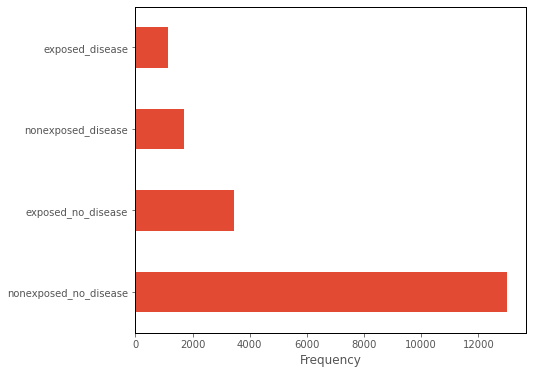

In [4]:
# displaying the population counts
pop_counts = pd.Series(population).value_counts()
display(pop_counts)

# plotting the counts
pop_counts.plot(kind = 'barh')
plt.xlabel('Frequency');

The contingency table below shows the population counts:

In [5]:
# creating counts based on exposure and disease status
population_n = len(population)

nonexposed_no_disease = np.count_nonzero(population == 'nonexposed_no_disease')

nonexposed_disease = np.count_nonzero(population == 'nonexposed_disease')

number_nonexposed = nonexposed_no_disease + nonexposed_disease

exposed_no_disease = np.count_nonzero(population == 'exposed_no_disease')

exposed_disease = np.count_nonzero(population == 'exposed_disease')

number_exposed = exposed_no_disease + exposed_disease

total_disease = nonexposed_disease + exposed_disease

# storing the counts in a dataframe
df_pop = pd.DataFrame(index = ['exposed:','nonexposed:', 'total:'], columns = ['disease:','no_disease:', 'total:'])

df_pop.loc['exposed:', 'disease:'] = exposed_disease
df_pop.loc['exposed:', 'no_disease:'] = exposed_no_disease
df_pop.loc['exposed:', 'total:']  = exposed_disease + exposed_no_disease
df_pop.loc['nonexposed:', 'disease:']= nonexposed_disease
df_pop.loc['nonexposed:', 'no_disease:'] = nonexposed_no_disease
df_pop.loc['nonexposed:', 'total:'] = nonexposed_disease + nonexposed_no_disease
df_pop.loc['total:', 'disease:'] = exposed_disease + nonexposed_disease
df_pop.loc['total:', 'no_disease:'] = exposed_no_disease + nonexposed_no_disease 
df_pop.loc['total:', 'total:'] = population_n

# correcting 0 counts (if there are any) so the odds ratio is defined
if df_pop.iloc[0,0] == 0:
    df_pop.iloc[0,0] = 0.5
    
if df_pop.iloc[0,1] == 0:
    df_pop.iloc[0,1] = 0.5

if df_pop.iloc[1,0] == 0:
    df_pop.iloc[1,0] = 0.5
    
if df_pop.iloc[1,1] == 0:
    df_pop.iloc[1,1] = 0.5

# show the counts
print('\nSimulated Population Data:')
display(df_pop)


Simulated Population Data:


,disease:,no_disease:,total:
exposed:,1127,3441,4568
nonexposed:,1708,13011,14719
total:,2835,16452,19287


The graph below shows the population odds of disease, conditional on exposure status:


True Odds Ratio: 2.4949511912758875



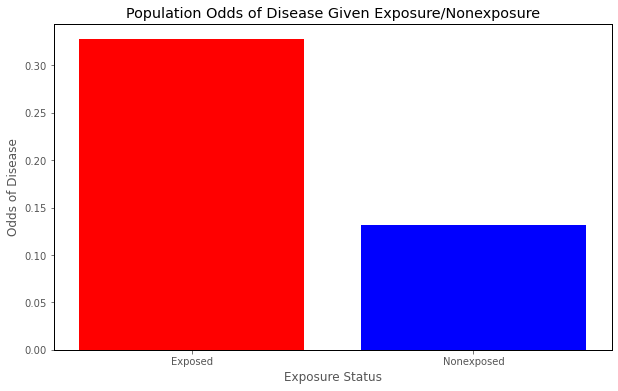

In [6]:
# calculating the population effect size
odds_disease_giv_exposure = exposed_disease/exposed_no_disease

odds_disease_giv_nonexposure = nonexposed_disease/nonexposed_no_disease

true_odds_ratio = odds_disease_giv_exposure/odds_disease_giv_nonexposure

true_log_odds_ratio = np.log(true_odds_ratio)

# print the true effect size
print()
print('True Odds Ratio:', true_odds_ratio)
print()

# plotting the population of odds of disease given exposure status
plt.figure(figsize = (10,6))
plt.bar(x = ['Exposed', 'Nonexposed'], height = [odds_disease_giv_exposure, odds_disease_giv_nonexposure]
       , color = ['red', 'blue'])
plt.xlabel('Exposure Status')
plt.ylabel('Odds of Disease')
plt.title('Population Odds of Disease Given Exposure/Nonexposure')
plt.show()

## Performing the meta-analysis

,exposed_disease,exposed_no_disease,nonexposed_disease,nonexposed_no_disease,sample_size,odds_ratio,log_odds_ratio,var_log_odds_ratio,ub_ci_log_odds_ratio,lb_ci_log_odds_ratio,weight
study number:,,,,,,,,,,,
0,35.0,117.0,47.0,416.0,615.0,2.647754,0.973712,0.060799,1.456997,0.490426,16.447672
1,37.0,152.0,58.0,525.0,772.0,2.203380,0.789993,0.052752,1.240162,0.339823,18.956586
2,2.0,13.0,8.0,60.0,83.0,1.153846,0.143101,0.718590,1.804586,-1.518385,1.391615
3,28.0,83.0,40.0,331.0,482.0,2.791566,1.026603,0.075784,1.566168,0.487038,13.195462
4,11.0,41.0,15.0,143.0,210.0,2.557724,0.939118,0.188959,1.791118,0.087117,5.292153
5,18.0,78.0,32.0,306.0,434.0,2.206731,0.791512,0.102894,1.420223,0.162801,9.718736
6,20.0,38.0,14.0,166.0,238.0,6.240602,1.831077,0.153768,2.599658,1.062495,6.503284
7,4.0,6.0,10.0,27.0,47.0,1.800000,0.587787,0.553704,2.046248,-0.870674,1.806020
8,33.0,103.0,48.0,416.0,600.0,2.776699,1.021263,0.063249,1.514190,0.528336,15.810540


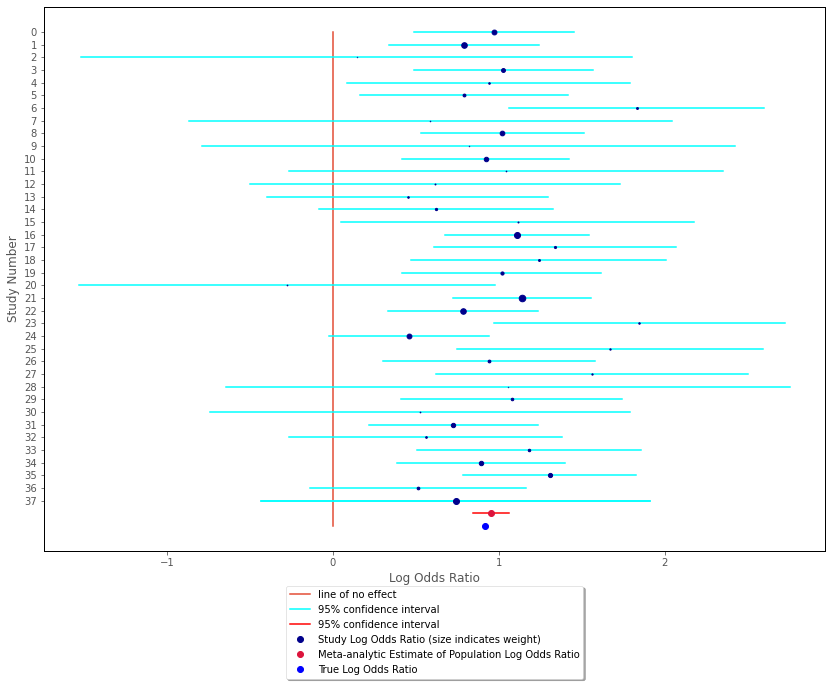

Z statistic of summary effect estimate =  17.5223725819218
p <  0.001


In [7]:
# simulating studies for an inverse-variance fixed effect meta-analysis
no_of_studies = np.random.randint(5,40)

studies = []

# randomly sampling from the population
for i in np.arange(no_of_studies):
    sample_size = np.random.randint(10,800)
    study = np.random.choice(population, size = sample_size, replace = False)
    studies.append(study)
    
counts = np.array([])


# creating a dataframe for the study counts
df = pd.DataFrame(columns = ['exposed_disease', 'exposed_no_disease',
                                             'nonexposed_disease','nonexposed_no_disease'])

# creating counts for disease status and exposure status within each study
for i in studies:
    temp_exposed_disease = np.count_nonzero(i == 'exposed_disease')
    temp_exposed_no_disease = np.count_nonzero(i == 'exposed_no_disease')
    temp_nonexposed_disease = np.count_nonzero(i == 'nonexposed_disease')
    temp_nonexposed_no_disease = np.count_nonzero(i == 'nonexposed_no_disease')
    study = [temp_exposed_disease,temp_exposed_no_disease,temp_nonexposed_disease,temp_nonexposed_no_disease]
    
    for i in np.arange(len(study)):
        if study[i] == 0:
            study[i] = 0.5
   
    df = df.append(pd.Series(study, index = ['exposed_disease', 'exposed_no_disease',
                                             'nonexposed_disease','nonexposed_no_disease']), ignore_index = True)

df['sample_size']= df['exposed_disease'] + df['exposed_no_disease']+ df['nonexposed_disease'] + df['nonexposed_no_disease']
    
df.index.name = 'study number:'


# calculating the odds ratio for each simulated study
df['odds_ratio'] = (df['exposed_disease']/df['exposed_no_disease'])/(df['nonexposed_disease']/df['nonexposed_no_disease'])

# ensuring all datatypes are float
for i in df.columns:
    df[i] = df[i].astype('float')
    
# calculating the log odds ratio for each simulated study
df['log_odds_ratio']= np.log(df['odds_ratio'])


    
# calculating the variance, standard error and 95% confidence intervals of the log odds ratio for each study
SE_log_odds_ratio = np.array([])
var_log_odds_ratio = np.array([])
var_log_odds_ratio = 1/df['exposed_disease'] + 1/df['exposed_no_disease'] + 1/df['nonexposed_disease'] + 1/df['nonexposed_no_disease'] 
SE_log_odds_ratio =  np.sqrt(var_log_odds_ratio)                        
df['var_log_odds_ratio'] = var_log_odds_ratio
df['ub_ci_log_odds_ratio'] = df['log_odds_ratio'] + 1.96 * SE_log_odds_ratio
df['lb_ci_log_odds_ratio'] = df['log_odds_ratio'] - 1.96 * SE_log_odds_ratio
df['weight'] = 1/var_log_odds_ratio
 
# display the data
display(df)

# creating a forest plot of odds ratios
y = []
zeros = []
for i in np.arange(len(df.index)+2):
    y.append(i)
    zeros.append(0)
    
study_list = list(df.index)


plt.figure(figsize = (14,10))   
plt.plot(zeros,y, label = 'line of no effect')
plt.xlabel('Log Odds Ratio')
plt.ylabel('Study Number')

plt.yticks(study_list)
plt.gca().invert_yaxis()

# plotting the confidence intervals
for i in np.arange(len(df)):
    xs = np.linspace(df['lb_ci_log_odds_ratio'].iloc[i],df['ub_ci_log_odds_ratio'].iloc[i])
    ys = []
    for x in xs:
        ys.append(study_list[i])
    plt.plot(xs, ys, color = 'cyan')
 
plt.plot(xs, ys, color = 'cyan', label = '95% confidence interval')


# creating weights to scale the points on the plot by the weight the study is given in the meta-analysis
stndrd_weights = df['weight']/np.sum(df['weight']) * 100
    
# plotting the study effect sizes
for i in np.arange(len(df)):
    plt.plot(df['log_odds_ratio'].iloc[i], i, 'o', color = 'darkblue', markersize = stndrd_weights[i])
  
    
# calculating the fixed effect meta-analysis statistics
effect_sizes = df['log_odds_ratio'].copy()
weights = df['weight'].copy()
sum_of_weights = np.sum(weights)

effect_size_times_weight = effect_sizes * weights

sum_effect_size_times_weight = np.sum(effect_size_times_weight)

weighted_mean = sum_effect_size_times_weight/sum_of_weights
var_weighted_mean = 1/sum_of_weights
se_weighted_mean = np.sqrt(var_weighted_mean)

ub_ci_wm = weighted_mean + 1.96 * se_weighted_mean
lb_ci_wm = weighted_mean - 1.96 * se_weighted_mean    

# calculating a 95% confidence interval for the summary effect
ci_line = np.linspace(lb_ci_wm,ub_ci_wm)

ci_ys = []
for i in np.arange(len(ci_line)):
    ci_ys.append(max(study_list)+1)

# plot the data
plt.plot(ci_line,ci_ys, color = 'red', label = '95% confidence interval')
plt.plot(df['log_odds_ratio'].iloc[len(df['log_odds_ratio'])-1], len(df['log_odds_ratio'])-1, 'o', color = 'darkblue', label = 'Study Log Odds Ratio (size indicates weight)')
plt.plot(weighted_mean,max(study_list)+1, 'o', color = 'crimson', label = 'Meta-analytic Estimate of Population Log Odds Ratio')
plt.plot(true_log_odds_ratio,max(df.index)+2, 'o', color = 'blue', label = 'True Log Odds Ratio')

# turning off a deprecation warning
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
    
ax = plt.subplot()
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=1)
plt.show()


# calculating the significance of the summary effect size
z = weighted_mean/se_weighted_mean
p = 2 * (1 - scipy.stats.norm.cdf(abs(z)))

if p == 0:
    p = 0.001
    print('Z statistic of summary effect estimate = ', z)
    print('p < ', p)
else:
    print('Z statistic of summary effect estimate = ', z)
    print('p = ', p)


# References
    
Borenstein, M., Hedges, L. V., Higgins, J. P., & Rothstein, H. R. (2010). A basic introduction to fixed‐effect and random‐effects models for meta‐analysis. Research synthesis methods, 1(2), 97-111.
 
Haidich, A. B. (2010). Meta-analysis in medical research. Hippokratia, 14(Suppl 1), 29.